In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy import io



In [2]:
mnist = io.loadmat("data/mnist_data.mat")

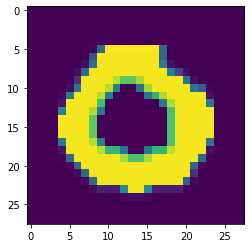

In [13]:
plt.imshow(mnist["training_data"][24].reshape(28, 28))

In [22]:
idx = np.arange(mnist["training_data"].shape[0])

In [23]:
np.random.shuffle(idx)

In [25]:
train = mnist["training_data"]
labels = mnist["training_labels"]

In [26]:
train_shf = train[idx]
lbl_shf = labels[idx]

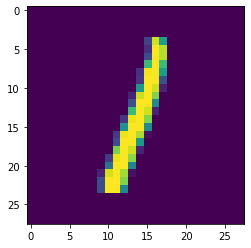

In [32]:
plt.imshow(train_shf[2134].reshape(28, 28))

In [37]:
valid_dat = train_shf[:10000]
valid_lbl = lbl_shf[:10000]
train_f = train_shf[10000:]
lbl_f = lbl_shf[10000:]

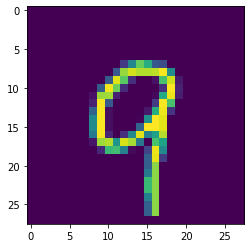

In [41]:
plt.imshow(train_f[234].reshape(28, 28))

In [42]:
lbl_f.shape

(50000, 1)

In [44]:
valid_dat.shape

(10000, 784)

In [45]:
train_f.shape

(50000, 784)

In [48]:
def split_data(train, labels, num_valid):
    num_data = train.shape[0]
    assert num_valid <= len(train)
    assert num_data == labels.shape[0]
    idx = np.arange(num_data)
    np.random.shuffle(idx)
    train_shf = train[idx]
    lbl_shf = labels[idx]
    valid_dat = train_shf[:num_valid]
    valid_lbl = lbl_shf[:num_valid]
    train_dat = train_shf[num_valid:]
    train_lbl = lbl_shf[num_valid:]
    return train_dat, train_lbl, valid_dat, valid_lbl

In [76]:
def load_and_save(filename, num = None, percent = None):
    dataset = io.loadmat("data/" + filename)
    if percent:
        num = int(dataset["training_labels"].shape[0] * percent)
    t_dat, t_lbl, v_dat, v_lbl = split_data(dataset["training_data"], 
                                            dataset["training_labels"],
                                            num)
    dataset["training_data"] = t_dat
    dataset["training_labels"] = t_lbl
    dataset["valid_data"] = v_dat
    dataset["valid_labels"] = v_lbl
    
    io.savemat("data/prep_" + filename, dataset)
    

In [77]:
load_and_save("mnist_data.mat", num = 10000)
load_and_save("spam_data.mat", percent = 0.2)
load_and_save("cifar10_data.mat", num = 5000)

In [56]:
b[234]

array([6], dtype=uint8)

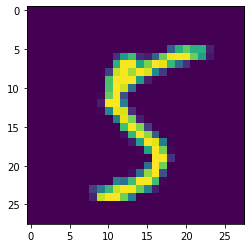

In [57]:
plt.imshow(c[234].reshape(28, 28))

In [58]:
d[234]

array([5], dtype=uint8)

In [59]:
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jan 18 18:01:01 2022',
 '__version__': '1.0',
 '__globals__': [],
 'training_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_labels': array([[1],
        [2],
        [5],
        ...,
        [1],
        [3],
        [8]], dtype=uint8),
 'test_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
data = io.loadmat("data/prep_mnist_data.mat")

In [24]:
def perform_training_mnist(data, num):
    td = data["training_data"][:num] / 255
    tl = np.ravel(data["training_labels"])[:num]
    vd = data["valid_data"][:num] / 255
    vl = np.ravel(data["valid_labels"])[:num]
    alg = svm.LinearSVC(max_iter = 5000)
    alg.fit(td, tl)
    vp = alg.predict(vd)
    tp = alg.predict(td)
    vacc = accuracy_score(vl, vp)
    tacc = accuracy_score(tl, tp)
    return num, vacc, tacc

In [25]:
qt = [100, 200, 500, 1000, 2000, 5000, 10000]
tot_acc = np.array([perform_training_mnist(data, i) for i in qt])

/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

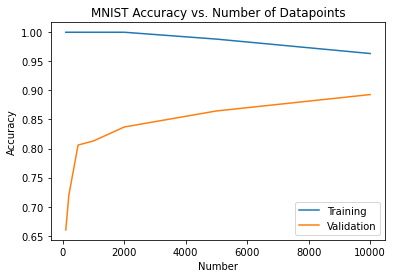

In [26]:
plt.plot(qt, tot_acc.T[2], label = "Training")
plt.plot(qt, tot_acc.T[1], label = "Validation")
plt.title("MNIST Accuracy vs. Number of Datapoints")
plt.legend()
plt.xlabel("Number")
plt.ylabel("Accuracy")

In [27]:
sata = io.loadmat("data/prep_spam_data.mat")

In [28]:
def perform_training_spam(data, num):
    td = data["training_data"][:num]
    tl = np.ravel(data["training_labels"])[:num]
    vd = data["valid_data"][:num]
    vl = np.ravel(data["valid_labels"])[:num]
    alg = svm.LinearSVC(max_iter = 100000)
    alg.fit(td, tl)
    vp = alg.predict(vd)
    tp = alg.predict(td)
    vacc = accuracy_score(vl, vp)
    tacc = accuracy_score(tl, tp)
    return num, vacc, tacc

In [29]:
qt = [100, 200, 500, 1000, 2000, 4139]
tot_vacc = np.array([perform_training_spam(sata, i) for i in qt])

/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

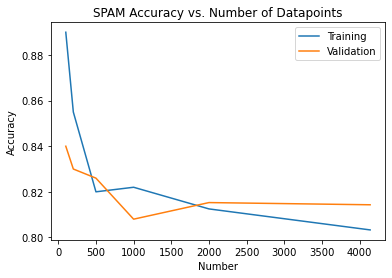

In [30]:
plt.plot(qt, tot_vacc.T[2], label = "Training")
plt.plot(qt, tot_vacc.T[1], label = "Validation")
plt.title("SPAM Accuracy vs. Number of Datapoints")
plt.legend()
plt.xlabel("Number")
plt.ylabel("Accuracy")

In [31]:
cata = io.loadmat("data/prep_cifar10_data.mat")

In [36]:
qt = [100, 200, 500, 1000, 2000, 5000]
tot_acc = np.array([perform_training_mnist(cata, i) for i in qt])

/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[1.000e+02, 2.000e-01, 1.000e+00],
       [2.000e+02, 2.650e-01, 1.000e+00],
       [5.000e+02, 2.200e-01, 1.000e+00],
       [1.000e+03, 2.220e-01, 1.000e+00],
       [2.000e+03, 2.405e-01, 9.980e-01],
       [5.000e+03, 2.618e-01, 9.582e-01]])

Text(0, 0.5, 'Accuracy')

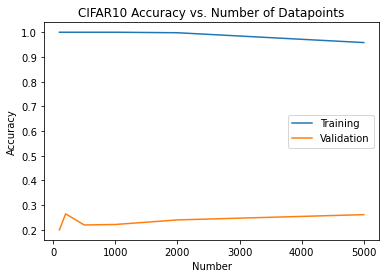

In [38]:
plt.plot(qt, tot_acc.T[2], label = "Training")
plt.plot(qt, tot_acc.T[1], label = "Validation")
plt.title("CIFAR10 Accuracy vs. Number of Datapoints")
plt.legend()
plt.xlabel("Number")
plt.ylabel("Accuracy")

In [163]:
C_vals = np.logspace(-3, 4, 8)

In [165]:
def perform_training_mnist_C(data, num, C_val):
    td = data["training_data"][:num] / 255
    tl = np.ravel(data["training_labels"])[:num]
    vd = data["valid_data"][:num] / 255
    vl = np.ravel(data["valid_labels"])[:num]
    alg = svm.LinearSVC(max_iter = 5000, C = C_val)
    alg.fit(td, tl)
    vp = alg.predict(vd)
    tp = alg.predict(td)
    vacc = accuracy_score(vl, vp)
    tacc = accuracy_score(tl, tp)
    return num, vacc, tacc

In [166]:
data = io.loadmat("data/prep_mnist_data.mat")

In [167]:
tot_acc = np.array([perform_training_mnist_C(data, 10000, i) for i in C_vals])

/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

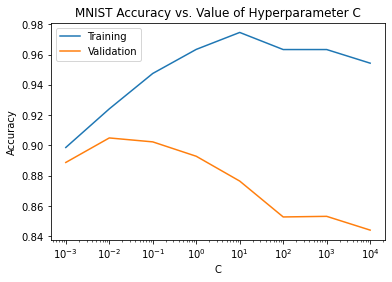

In [181]:
plt.plot(C_vals, tot_acc.T[2], label = "Training")
plt.plot(C_vals, tot_acc.T[1], label = "Validation")
plt.title("MNIST Accuracy vs. Value of Hyperparameter C")
plt.legend()
plt.semilogx()
plt.xlabel("C")
plt.ylabel("Accuracy")

In [190]:
tot_acc.T[2]

array([0.8986, 0.9241, 0.9475, 0.9634, 0.9746, 0.9633, 0.9633, 0.9543])

In [191]:
tot_acc.T[1]

array([0.8887, 0.9049, 0.9023, 0.8928, 0.8764, 0.8527, 0.8531, 0.844 ])

In [192]:
C_vals

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [172]:
spam_dat = io.loadmat("data/spam_data.mat")

In [173]:
def split_data_kcross(train, labels, num_valid, n):
    num_data = train.shape[0]
    assert num_valid <= len(train)
    assert num_data == labels.shape[0]
    idx = np.arange(num_data)
    np.random.shuffle(idx)
    train_shf = train[idx]
    lbl_shf = labels[idx]
    print(n * num_valid)
    print((n + 1) * num_valid)
    valid_dat = train_shf[n * num_valid : (n + 1) * num_valid]
    valid_lbl = lbl_shf[n * num_valid : (n + 1) * num_valid]
    train_dat = np.concatenate([train_shf[:n * num_valid], train_shf[(n + 1) * num_valid:]])
    train_lbl = np.concatenate([lbl_shf[:n * num_valid], lbl_shf[(n + 1) * num_valid:]])
    return train_dat, train_lbl, valid_dat, valid_lbl

In [174]:
total_data = [split_data_kcross(spam_dat["training_data"], spam_dat["training_labels"], spam_dat["training_data"].shape[0] // 5, i) for i in range(5)]

0
1034
1034
2068
2068
3102
3102
4136
4136
5170


In [175]:
def perform_training_spam_cross(data, C_val):
    td = data[0]
    tl = np.ravel(data[1])
    vd = data[2]
    vl = np.ravel(data[3])
    alg = svm.LinearSVC(max_iter = 10000, C = C_val)
    alg.fit(td, tl)
    vp = alg.predict(vd)
    tp = alg.predict(td)
    vacc = accuracy_score(vl, vp)
    tacc = accuracy_score(tl, tp)
    return vacc, tacc

def averageTraining(total_data, C_val):
    res = np.array([perform_training_spam_cross(total_data[i], C_val) for i in range(5)])
    vacc = np.mean(res.T[0])
    tacc = np.mean(res.T[1])
    return vacc, tacc

In [176]:
C_vals = np.logspace(-3, 4, 8)
res = np.array([averageTraining(total_data, i) for i in C_vals])

/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shri/opt/miniconda3/envs/astroconda/lib/python3.7/site-packag

Text(0, 0.5, 'Accuracy')

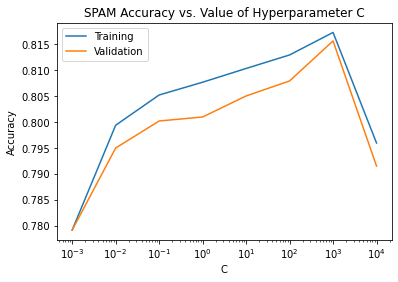

In [186]:
plt.plot(C_vals, res.T[1], label = "Training")
plt.plot(C_vals, res.T[0], label = "Validation")
plt.title("SPAM Accuracy vs. Value of Hyperparameter C")
plt.legend()
plt.semilogx()
plt.xlabel("C")
plt.ylabel("Accuracy")

In [187]:
res.T[1]

array([0.77912035, 0.79937168, 0.80521991, 0.80768487, 0.81034316,
       0.81295312, 0.81730304, 0.79594007])

In [188]:
res.T[0]

array([0.77911025, 0.79497099, 0.80019342, 0.80096712, 0.80502901,
       0.80793037, 0.81566731, 0.79148936])

In [189]:
C_vals

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])